# Step 8: 2-D Convection

This time we have 2 equations, one for the velocity along the x direction ($u$) and one for the velocity along the y direction ($v$).

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = 0$$
$$\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = 0$$

The discretized version of them lead to solely two unkowns, which isolated give:

$$u_{i,\; j}^{n+1} = u_{i,\; j}^n - u_{i,\; j}^n\frac{\Delta t}{\Delta x}\left(u_{i,\; j}^n - u_{i-1,\; j}^n\right) - v_{i,\; j}^n\frac{\Delta t}{\Delta y}\left(u_{i,\; j}^n - u_{i,\; j-1}^n\right)$$
$$v_{i,\; j}^{n+1} = v_{i,\; j}^n - u_{i,\; j}^n\frac{\Delta t}{\Delta x}\left(v_{i,\; j}^n - v_{i-1,\; j}^n\right) - v_{i,\; j}^n\frac{\Delta t}{\Delta y}\left(v_{i,\; j}^n - v_{i,\; j-1}^n\right)$$

At the moment, I wrote the code without the upwind difference scheme. If my spare time will permit it, I'll try to implement a 2-D version of the aforementioned scheme.

The initial and boundary conditions considered here are the same as before for both the velocity components, I have not tried different conditions yet.

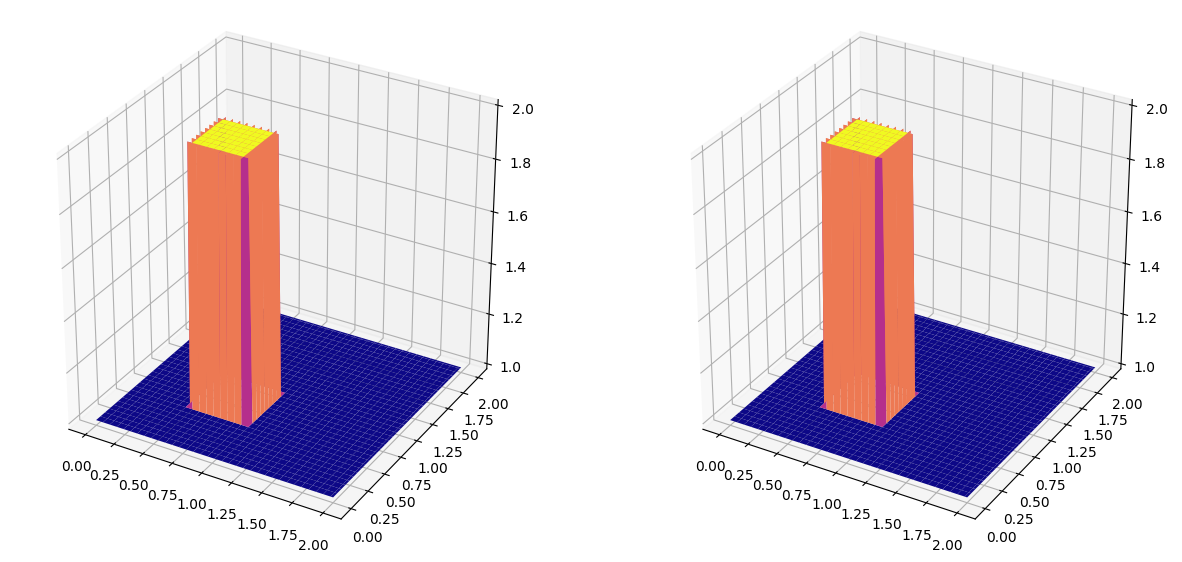

In [50]:
# Let's start by importing some useful 3D packages
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt, cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

nx = 101
ny = 101
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

nt = 80
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u_ICs = np.ones((nx, ny))   # Initial conditions of u
u_ICs[int(0.5 / dx) : int(1 / dx + 1), int(0.5 / dy) : int(1 / dy + 1)] = 2
v_ICs = np.ones((nx, ny))   # Initial conditions of v
v_ICs[int(0.5 / dx) : int(1 / dx + 1), int(0.5 / dy) : int(1 / dy + 1)] = 2

u = u_ICs.copy()
v = v_ICs.copy()
un = np.zeros((nx, ny))   # Placeholder of u during computation
vn = np.zeros((nx, ny))   # Placeholder of v during computation

# Plot of ICs
fig = plt.figure(figsize = (15, 7), dpi = 100)
X, Y = np.meshgrid(x, y)   # Matrix which holds mesh infos to pass to ax.plot_surface

ax1 = fig.add_subplot(121, projection = '3d')   # Dunno what it exactly does...
ax1.set_aspect('equal')
ax1.plot_surface(X, Y, u_ICs, cmap = cm.plasma)

ax2 = fig.add_subplot(122, projection = '3d')   # Dunno what it exactly does...
ax2.set_aspect('equal')
ax2.plot_surface(X, Y, v_ICs, cmap = cm.plasma)

plt.show()
# plt.close()

In [53]:
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()

    u[1:, 1:] = un[1:,1:] - un[1:,1:]*(dt/dx)*(un[1:,1:] - un[0:-1,1:]) - vn[1:,1:]*(dt/dy)*(un[1:,1:] - un[1:,0:-1])
    v[1:, 1:] = vn[1:,1:] - un[1:,1:]*(dt/dx)*(vn[1:,1:] - vn[0:-1,1:]) - vn[1:,1:]*(dt/dy)*(vn[1:,1:] - vn[1:,0:-1])

    # BCs:
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1

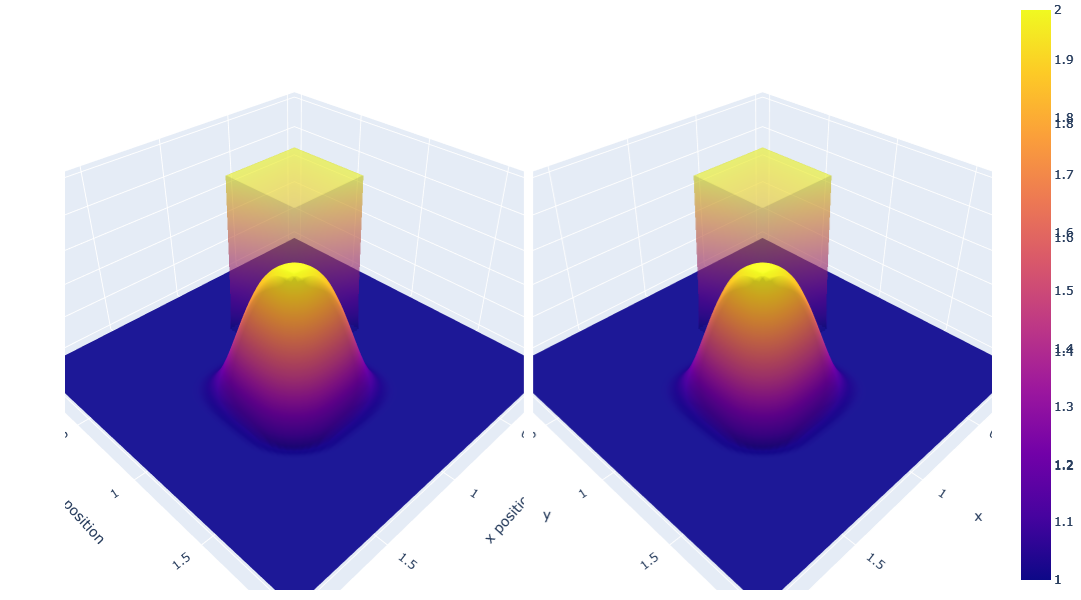

In [56]:
# Plot of simulation results
'''
fig = plt.figure(figsize = (15, 7), dpi = 100)
X, Y = np.meshgrid(x, y)   # Matrix which holds mesh infos to pass to ax.plot_surface

ax1 = fig.add_subplot(121, projection = '3d')   # Dunno what it exactly does...
ax1.set_aspect('equal')
ax1.plot_surface(X, Y, u, cmap = cm.plasma)
ax1.set_title('v evolution')

ax2 = fig.add_subplot(122, projection = '3d')   # Dunno what it exactly does...
ax2.set_aspect('equal')
ax2.plot_surface(X, Y, v, cmap = cm.plasma)
ax2.set_title('v evolution')

plt.show()
'''

# fig = make_subplots(rows=1, cols=2)
fig = make_subplots(rows=1, cols=2, 
                     horizontal_spacing = 0.01,  vertical_spacing  = 0.1,
                     specs=[[{'type': 'scene'}, {'type': 'scene'}]] )

fig.add_trace(
    go.Surface(z=u, x=x, y=y, name='u'),
    row=1, col=1
)
fig.add_trace(
    go.Surface(z=u_ICs, x=x, y=y, name='u', opacity=0.4),
    row=1, col=1
)

fig.add_trace(
    go.Surface(z=v, x=x, y=y, name='u'),
    row=1, col=2
)
fig.add_trace(
    go.Surface(z=v_ICs, x=x, y=y, name='u', opacity=0.4),
    row=1, col=2
)

# fig = go.Figure(data=[go.Surface(z=u, x=x, y=y, name='u'), 
#                       go.Surface(z=ICs, x=x, y=y, name='ICs')])

fig.update_layout(title='Evolution', autosize=False, showlegend=True, 
                  width=1100, height=600, 
                  margin=dict(l=65, r=50, b=10, t=0),
                  scene=dict(xaxis_title='x position', yaxis_title='y position', zaxis_title='Intensity'))

fig.show()